# CSE474/574 - Programming Assignment 2

## Part 2 - Image Classification

Additional library requirement: `Pillow`. See [here](https://anaconda.org/anaconda/pillow) for installation instructions.

For this part, we will use `keras` with a `tensorflow` backend, instead of directly using `tensorflow`, as in Part 1. See [here](https://anaconda.org/conda-forge/keras) for installation instructions.

In [15]:
from __future__ import print_function
from keras.models import Sequential
from keras.layers import Dense, Activation

import numpy as np
import random as rd
import time
import pickle
import os
from PIL import Image
#os.environ["CUDA_VISIBLE_DEVICES"]="1"
import matplotlib.pyplot as plt
%matplotlib inline

In [16]:
def resize_images(data,size):
    '''
    Resize images in a given data matrix (1 per row) to the specified size in the tuple - size.
    '''
    resized_data = np.empty((data.shape[0],size[0]*size[1]))
    for i in range(data.shape[0]):
        d = (np.array(Image.fromarray(data[i,:].reshape((28,28))).resize(size))).flatten()
        resized_data[i,:] = d
    return resized_data    

In [17]:
classes = ['apple', 'airplane', 'basketball', 'axe', 'banana', 'horse', 'arm', 'alarm clock', 'ant', 'bed']

In [18]:
# Preparing the data set
with open('AI_quick_draw.pickle', 'rb') as open_ai_quick:
    data_train = pickle.load(open_ai_quick)
    label_train1 = pickle.load(open_ai_quick)
    data_test = pickle.load(open_ai_quick)
    label_test1 = pickle.load(open_ai_quick)
n_classes = len(np.unique(label_train1))
# convert labels to 0-1 hot encoding
label_train = np.zeros((label_train1.shape[0], n_classes))
a = np.arange(label_train1.shape[0], dtype=np.int64)
b = np.array(label_train1, dtype=np.int64).reshape((label_train1.shape[0],))
label_train[a, b] = 1

label_test = np.zeros((label_test1.shape[0], n_classes))
c = np.arange(label_test1.shape[0], dtype=np.int64)
d = np.array(label_test1, dtype=np.int64).reshape((label_test1.shape[0],))
label_test[c, d] = 1

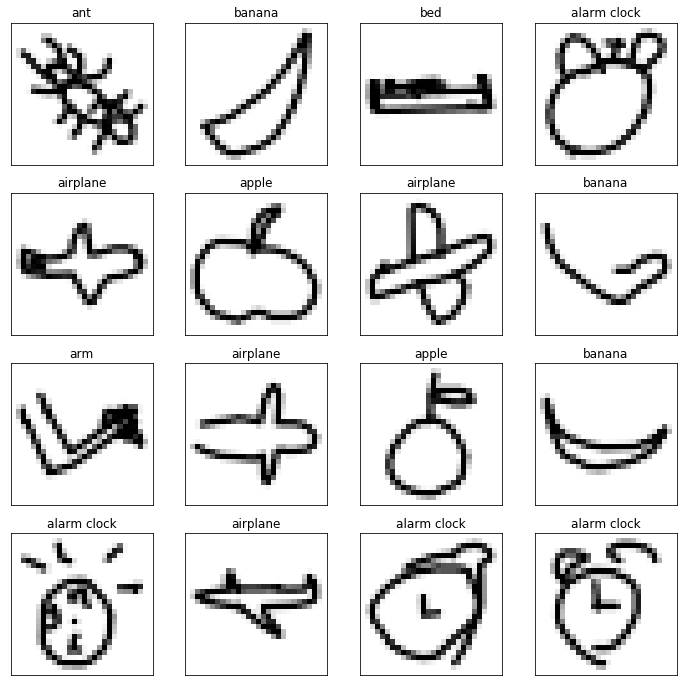

In [19]:
# visualize some images
fig = plt.figure(figsize=[12,12])
for i in range(16):
    ax = plt.subplot(4,4,i+1)    
    ind = np.random.randint(0,data_train.shape[0])
    plt.imshow(data_train[ind,:].reshape((28,28)),cmap='Greys')
    plt.xticks([])
    plt.yticks([])
    t = plt.title(classes[int(label_train1[ind])])

In [20]:
# for some macosx installations, conflicting copies of mpilib causes trouble with tensorflow.
# use the following two lines to resolve that issue
import os
os.environ['KMP_DUPLICATE_LIB_OK']='True'
os.environ["CUDA_VISIBLE_DEVICES"] = "-1"

**WARNING**: This cell will take a significantly long time to run

In [ ]:
model = Sequential()
model.add(Dense(256, activation='relu', input_dim=data_train.shape[1]))
model.add(Dense(64, activation='relu'))
# you can add more Dense layers here
model.add(Dense(10, activation='softmax'))
model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
model.fit(data_train, label_train, epochs=500, batch_size=32)

Epoch 1/500
100000/100000 [==============================] - 7s 68us/step - loss: 2.4496 - accuracy: 0.2348
Epoch 2/500
100000/100000 [==============================] - 7s 66us/step - loss: 2.1319 - accuracy: 0.2429
Epoch 3/500
100000/100000 [==============================] - 6s 56us/step - loss: 2.1602 - accuracy: 0.2527
Epoch 4/500
100000/100000 [==============================] - 5s 53us/step - loss: 2.1587 - accuracy: 0.2528
Epoch 5/500
100000/100000 [==============================] - 5s 52us/step - loss: 2.2162 - accuracy: 0.2538
Epoch 6/500
100000/100000 [==============================] - 5s 51us/step - loss: 2.2404 - accuracy: 0.2417
Epoch 7/500
100000/100000 [==============================] - 5s 52us/step - loss: 2.2999 - accuracy: 0.2343
Epoch 8/500
100000/100000 [==============================] - 5s 52us/step - loss: 2.2497 - accuracy: 0.2345
Epoch 9/500
100000/100000 [==============================] - 5s 53us/step - loss: 2.2610 - accuracy: 0.2331
Epoch 10/500
100000/100000 [

100000/100000 [==============================] - 7s 68us/step - loss: 2.2095 - accuracy: 0.2323
Epoch 77/500
100000/100000 [==============================] - 7s 75us/step - loss: 2.1992 - accuracy: 0.2280
Epoch 78/500
100000/100000 [==============================] - 8s 79us/step - loss: 2.2795 - accuracy: 0.2333
Epoch 79/500
100000/100000 [==============================] - 9s 86us/step - loss: 2.2080 - accuracy: 0.2321
Epoch 80/500
100000/100000 [==============================] - 10s 104us/step - loss: 2.1928 - accuracy: 0.2356
Epoch 81/500
100000/100000 [==============================] - 7s 73us/step - loss: 2.2264 - accuracy: 0.2365
Epoch 82/500
100000/100000 [==============================] - 6s 58us/step - loss: 2.2325 - accuracy: 0.2331
Epoch 83/500
100000/100000 [==============================] - 6s 58us/step - loss: 2.2388 - accuracy: 0.2341
Epoch 84/500
100000/100000 [==============================] - 5s 54us/step - loss: 2.2682 - accuracy: 0.2297
Epoch 85/500
100000/100000 [==

100000/100000 [==============================] - 6s 57us/step - loss: 2.2585 - accuracy: 0.2339
Epoch 151/500
100000/100000 [==============================] - 6s 59us/step - loss: 2.1258 - accuracy: 0.2305
Epoch 152/500
100000/100000 [==============================] - 6s 58us/step - loss: 2.1897 - accuracy: 0.2315
Epoch 153/500
100000/100000 [==============================] - 6s 61us/step - loss: 2.1974 - accuracy: 0.2279
Epoch 154/500
100000/100000 [==============================] - 6s 62us/step - loss: 2.1677 - accuracy: 0.2281
Epoch 155/500
100000/100000 [==============================] - 6s 62us/step - loss: 2.2634 - accuracy: 0.2317
Epoch 156/500
100000/100000 [==============================] - 6s 63us/step - loss: 2.2664 - accuracy: 0.2305
Epoch 157/500
100000/100000 [==============================] - 6s 60us/step - loss: 2.2271 - accuracy: 0.2280
Epoch 158/500
100000/100000 [==============================] - 6s 62us/step - loss: 2.1487 - accuracy: 0.2251
Epoch 159/500
100000/100

100000/100000 [==============================] - 6s 63us/step - loss: 2.3726 - accuracy: 0.2297
Epoch 225/500
100000/100000 [==============================] - 7s 67us/step - loss: 2.3331 - accuracy: 0.2215
Epoch 226/500
100000/100000 [==============================] - 6s 61us/step - loss: 2.3176 - accuracy: 0.2271
Epoch 227/500
100000/100000 [==============================] - 7s 66us/step - loss: 2.3879 - accuracy: 0.2244
Epoch 228/500
100000/100000 [==============================] - 6s 63us/step - loss: 2.3166 - accuracy: 0.2244
Epoch 229/500
100000/100000 [==============================] - 6s 63us/step - loss: 2.2833 - accuracy: 0.2198
Epoch 230/500
100000/100000 [==============================] - 6s 64us/step - loss: 2.3673 - accuracy: 0.2236
Epoch 231/500
100000/100000 [==============================] - 7s 66us/step - loss: 2.3456 - accuracy: 0.2247
Epoch 232/500
100000/100000 [==============================] - 7s 67us/step - loss: 2.2201 - accuracy: 0.2151
Epoch 233/500
100000/100

100000/100000 [==============================] - 7s 65us/step - loss: 2.2333 - accuracy: 0.2356
Epoch 299/500
100000/100000 [==============================] - 7s 66us/step - loss: 2.2031 - accuracy: 0.2354
Epoch 300/500
100000/100000 [==============================] - 6s 64us/step - loss: 2.1844 - accuracy: 0.2359
Epoch 301/500
100000/100000 [==============================] - 6s 61us/step - loss: 2.1752 - accuracy: 0.2406
Epoch 302/500
100000/100000 [==============================] - 6s 63us/step - loss: 2.1789 - accuracy: 0.2380
Epoch 303/500
100000/100000 [==============================] - 7s 67us/step - loss: 2.2032 - accuracy: 0.2406
Epoch 304/500
100000/100000 [==============================] - 6s 57us/step - loss: 2.3123 - accuracy: 0.2409
Epoch 305/500
100000/100000 [==============================] - 6s 58us/step - loss: 2.1152 - accuracy: 0.2326
Epoch 306/500
100000/100000 [==============================] - 6s 61us/step - loss: 2.3423 - accuracy: 0.2328
Epoch 307/500
100000/100

In [16]:
# save the model to use with the drawing app (this will be released later)
model.save('pa2-part2-model.h5')